# Entropy

For a set *S* of data, each member of which is labeled as belonging to one of a finite number of classes *C<sub>1</sub> , ..., C<sub>n</sub>*.

In math terms, if *p<sub>i</sub>* is the proportion of data labeled as class *c<sub>i</sub>*, we define the entropy as:

*H(S) = − p<sub>1</sub> log<sub>2</sub> p<sub>1</sub> − ... − p<sub>n</sub> log<sub>2</sub> p<sub>n</sub>*


In [59]:
# imports, Python core
from typing import List
import math

# imports, Python packages
import matplotlib.pyplot as plt

# imports, same directory
from ch05_statistics import mean
from ch05_statistics import median
from ch05_statistics import mode
from ch05_statistics import data_range
from ch17_decission_trees import entropy

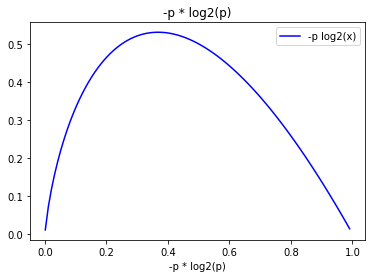

In [60]:

def p_log2(x: float) -> float:
    return -x * math.log2(x)


# x-axis and y-axis values
xs = [(i/100)+0.001 for i in range(0, 100, 1)]
ys = [p_log2(x) for x in xs]

# create a line chart with the least squared fit estimated values
plt.plot(xs, ys, 'b-', label='-p log2(x)')

# labels, title and show
plt.legend(loc='upper right')
plt.xlabel("p")
plt.xlabel("-p * log2(p)")
plt.title("-p * log2(p)")
plt.show()


In [61]:

ll = []

ps = [0.01, 0.99]
ll.append(ps)
ps = [0.50, 0.50]
ll.append(ps)
ps = [0.33, 0.33, 0.34]
ll.append(ps)
ps = [0.25, 0.25, 0.25, 0.25]
ll.append(ps)
ps = [0.2, 0.2, 0.2, 0.2, 0.2]
ll.append(ps)
ps = [0.1 for i in range(0, 100, 10)]
ll.append(ps)
ps = [0.02 for i in range(0, 100, 2)]
ll.append(ps)
ps = [0.01 for i in range(0, 100, 1)]
ll.append(ps)

for l in ll:
    print('sum of ps is: ', round(sum(l), 1))
    print('number of elements in ps: ', len(l))
    print('mean value of ps is: ', mean(l))
    print('median value of ps is: ', median(l))
    print('mode of ps is: ', mode(l))
    print('minimum value in ps is: ', min(l))
    print('maximum value in ps is: ', max(l))
    print('range of ps is: ', round(data_range(l), 2))
    print('entropy of ps is: ', round(entropy(l), 2))
    print('\n')


sum of ps is:  1.0
number of elements in ps:  2
mean value of ps is:  0.5
median value of ps is:  0.5
mode of ps is:  [0.01, 0.99]
minimum value in ps is:  0.01
maximum value in ps is:  0.99
range of ps is:  0.98
entropy of ps is:  0.08


sum of ps is:  1.0
number of elements in ps:  2
mean value of ps is:  0.5
median value of ps is:  0.5
mode of ps is:  [0.5]
minimum value in ps is:  0.5
maximum value in ps is:  0.5
range of ps is:  0.0
entropy of ps is:  1.0


sum of ps is:  1.0
number of elements in ps:  3
mean value of ps is:  0.33
median value of ps is:  0.33
mode of ps is:  [0.33]
minimum value in ps is:  0.33
maximum value in ps is:  0.34
range of ps is:  0.01
entropy of ps is:  1.58


sum of ps is:  1.0
number of elements in ps:  4
mean value of ps is:  0.25
median value of ps is:  0.25
mode of ps is:  [0.25]
minimum value in ps is:  0.25
maximum value in ps is:  0.25
range of ps is:  0.0
entropy of ps is:  2.0


sum of ps is:  1.0
number of elements in ps:  5
mean value of ps 

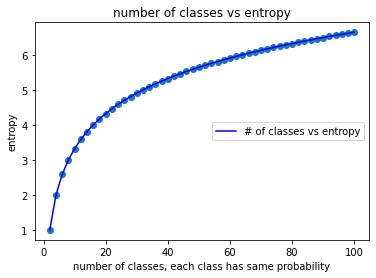

In [62]:
def prob_distribution_vs_classes(c: int) -> List[float]:
    """homogeneous probability distribution for a c number of classes"""
    int(c)
    probability_distribution = [1/c for i in range(0, c)]
    return probability_distribution

def entropy_vs_classes(c: int) -> float:
    """entropy for the probability distribution of c classes,
    each class with the same probablity"""
    pd = prob_distribution_vs_classes(c)
    return entropy(pd)

number_of_classes = [i for i in range(2, 102, 2)]
entropies_vs_classes = [entropy(prob_distribution_vs_classes(c)) for c in number_of_classes]

# generate scatter plot
plt.scatter(number_of_classes, entropies_vs_classes)
plt.plot(number_of_classes, entropies_vs_classes, 'b-', label='# of classes vs entropy')

# labels, title and show
plt.legend(loc='center right')
plt.xlabel("number of classes, each class has same probability")
plt.ylabel("entropy")
plt.title("number of classes vs entropy")
plt.show()


# Entropy of a partition

Mathematically, if we partition our data *S* into subsets *S<sub>1</sub> , ..., S<sub>m</sub>* containing proportions *q<sub>1</sub> , ..., q<sub>m</sub>* of the data, then we compute the entropy of the partition as a weighted sum:

*H = q<sub>1</sub> H(S<sub>1</sub>) + . . . + q<sub>m</sub> H(S<sub>m</sub>)*

In [63]:
def partition_entropy(subsets: List[float]) -> float:
    len_total = sum([len(s) for s in subsets])
    H = 0
    for s in subsets:
        len_subset = len(s)
        p_s = len_subset/len_total
        H_s = entropy(s)
        H = H + H_s
    return H

# Creating a Decision Tree

In [64]:
from typing import Dict, TypeVar
from typing import NamedTuple, Optional
from typing import Any
from collections import Counter
from collections import defaultdict

T = TypeVar('T')  # generic type for inputs

In [65]:
class Candidate(NamedTuple):
    level: str
    lang: str
    tweets: bool
    phd: bool
    did_well: Optional[bool] = None  # allow unlabeled data

#                   level     lang     tweets  phd  did_well
inputs = [Candidate('Senior', 'Java',   False, False, False),
          Candidate('Senior', 'Java',   False, True,  False),
          Candidate('Mid',    'Python', False, False, True),
          Candidate('Junior', 'Python', False, False, True),
          Candidate('Junior', 'R',      True,  False, True),
          Candidate('Junior', 'R',      True,  True,  False),
          Candidate('Mid',    'R',      True,  True,  True),
          Candidate('Senior', 'Python', False, False, False),
          Candidate('Senior', 'R',      True,  False, True),
          Candidate('Junior', 'Python', True,  False, True),
          Candidate('Senior', 'Python', True,  True,  True),
          Candidate('Mid',    'Python', False, True,  True),
          Candidate('Mid',    'Java',   True,  False, True),
          Candidate('Junior', 'Python', False, True,  False)
         ]

In [72]:
#def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
#    """Partition the inputs into lists based on the specified attribute."""

def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
    """Partition the inputs into lists based on the specified attribute."""
    partitions: Dict[Any, List[T]] = defaultdict(list)
    for input in inputs:
        key = getattr(input, attribute)  # value of the specified attribute
        partitions[key].append(input)    # add input to the correct partition
    return partitions



p = partition_by(inputs, "level")
"""
print(type(p))
print(p.keys())
"""
print(p.values())
print(len(p.values()))
print(type(p.values()))


def to_ll(partitions: dict) -> list:
    ll = [
        l for l in list(partitions.values())
    ]
    return ll

ll = to_ll(p)
print(ll)

dict_values([[Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False), Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False), Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False), Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Senior', lang='Python', tweets=True, phd=True, did_well=True)], [Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True), Candidate(level='Mid', lang='Python', tweets=False, phd=True, did_well=True), Candidate(level='Mid', lang='Java', tweets=True, phd=False, did_well=True)], [Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Junior', lang='R', tweets=True, phd=True, did_well=False), Candidate(level='Junior', lang='Python', tw